### 📦 1. Imports & Setup

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Paths
base_path = "/content/drive/MyDrive/project/AI-Driven Thermal System Design/data_set"
file_paths = {
    "itcm_dataset_6689": os.path.join(base_path, "itcm_dataset_6689.csv"),
    "person1": os.path.join(base_path, "itcm_dataset_person1_346.csv"),
    "person2": os.path.join(base_path, "itcm_dataset_person2_385.csv"),
    "person3": os.path.join(base_path, "itcm_dataset_person3_345.csv"),
    "person4": os.path.join(base_path, "itcm_dataset_person4_448.csv"),
    "person5": os.path.join(base_path, "itcm_dataset_person5_385.csv"),
    "person6": os.path.join(base_path, "itcm_dataset_person6_374.csv")
}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 🧪 2. Phase 2A: Synthetic Simulation

In [10]:
# Simulation parameters
L = 1.0
Nx = 50
dx = L / (Nx - 1)
alpha = 1e-4
dt = 0.1
T_total = 10.0
Nt = int(T_total / dt)

# Initial condition
T = np.zeros(Nx)
T[0] = 100
T[-1] = 50

# Run FDM
T_history = [T.copy()]
for _ in range(Nt):
    T_new = T.copy()
    for i in range(1, Nx - 1):
        T_new[i] = T[i] + alpha * dt / dx**2 * (T[i+1] - 2*T[i] + T[i-1])
    T = T_new
    T_history.append(T.copy())

T_history = np.array(T_history)
positions = np.linspace(0, L, Nx)
final_temp = T_history[-1]

### 📊 3. Phase 2B: Real Data Integration (using Person 1 as example)

In [11]:
# Load real dataset
df_real = pd.read_csv(file_paths['person1'])

# Extract air temperature column ('at')
real_temps = df_real['at'].dropna().reset_index(drop=True)
real_temps = real_temps[:Nt+1].values  # match simulation steps

# Use real data as left boundary
T = np.zeros(Nx)
T[-1] = 50
T_history_real = []

for n in range(Nt):
    T[0] = real_temps[n]
    T_new = T.copy()
    for i in range(1, Nx - 1):
        T_new[i] = T[i] + alpha * dt / dx**2 * (T[i+1] - 2*T[i] + T[i-1])
    T = T_new
    T_history_real.append(T.copy())

T_history_real = np.array(T_history_real)


### 📈 4. Visualization & Comparison

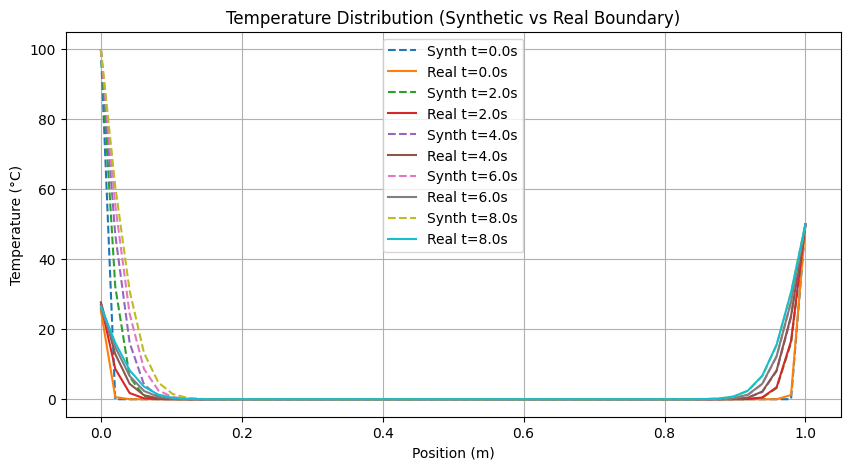

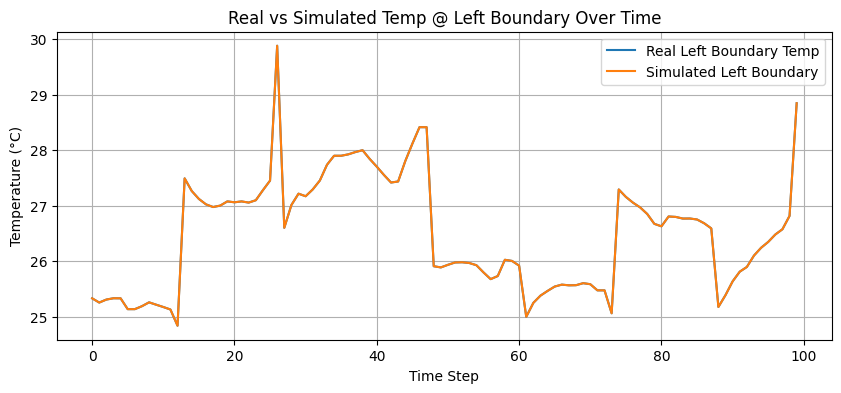

In [12]:
# Plot temperature distribution over space for both synthetic and real-boundary simulations
num_steps_to_plot = min(len(T_history), len(T_history_real))

plt.figure(figsize=(10, 5))
for i in range(0, num_steps_to_plot, num_steps_to_plot // 5):
    plt.plot(positions, T_history[i], label=f"Synth t={i*dt:.1f}s", linestyle="--")
    plt.plot(positions, T_history_real[i], label=f"Real t={i*dt:.1f}s")
plt.title("Temperature Distribution (Synthetic vs Real Boundary)")
plt.xlabel("Position (m)")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()

# Plot real vs simulated temperature at left boundary over time
plt.figure(figsize=(10, 4))
plt.plot(real_temps[:Nt], label="Real Left Boundary Temp")
plt.plot(T_history_real[:, 0], label="Simulated Left Boundary")
plt.title("Real vs Simulated Temp @ Left Boundary Over Time")
plt.xlabel("Time Step")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

### 📏 5. Error Metrics

In [13]:
rmse = mean_squared_error(real_temps[:Nt], T_history_real[:, 0])
mae = mean_absolute_error(real_temps[:Nt], T_history_real[:, 0])

print("✅ Phase 2A (Synthetic)")
print(f"Max Temperature: {np.max(final_temp):.2f} °C")
print(f"Efficiency Score: {(np.sum(final_temp) - np.sum(T_history[0])) / (T_total * L):.4f}")

print("\n✅ Phase 2B (Real Data Integration)")
print(f"RMSE (Left Edge): {rmse:.4f}")
print(f"MAE  (Left Edge): {mae:.4f}")

✅ Phase 2A (Synthetic)
Max Temperature: 100.00 °C
Efficiency Score: 19.4491

✅ Phase 2B (Real Data Integration)
RMSE (Left Edge): 0.0000
MAE  (Left Edge): 0.0000


### 📊 6. Phase 2B: Real Data Integration (using Person 2 as example)

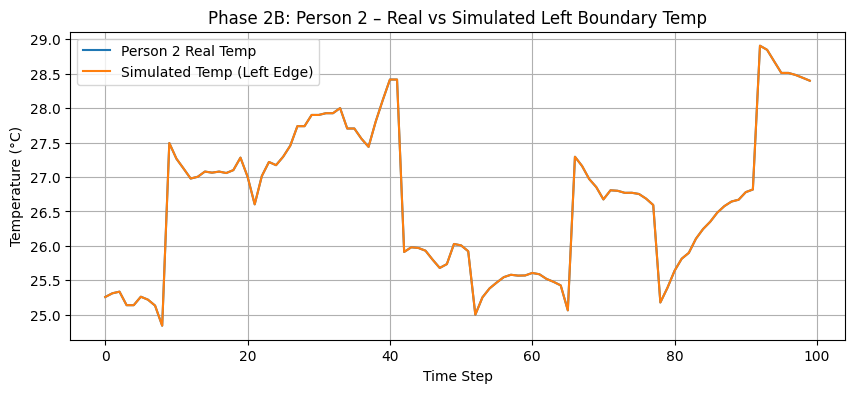

✅ Phase 2B (Person 2)
RMSE (Left Edge): 0.0000
MAE  (Left Edge): 0.0000


In [14]:
# 📦 Load Person 2 dataset and extract air temperature
df_real_p2 = pd.read_csv(file_paths['person2'])  # Path already defined in earlier steps

# Clean and align the 'at' column
real_temps_p2 = df_real_p2['at'].dropna().reset_index(drop=True)
real_temps_p2 = real_temps_p2[:Nt+1].values  # Match synthetic time steps

# 🔁 Run FDM simulation using Person 2's air temperature as left boundary
T = np.zeros(Nx)
T[-1] = 50  # Fixed right boundary
T_history_real_p2 = []

for n in range(Nt):
    T[0] = real_temps_p2[n]  # Left boundary from real data
    T_new = T.copy()
    for i in range(1, Nx - 1):
        T_new[i] = T[i] + alpha * dt / dx**2 * (T[i+1] - 2*T[i] + T[i-1])
    T = T_new
    T_history_real_p2.append(T.copy())

T_history_real_p2 = np.array(T_history_real_p2)

# 📈 Plot real vs simulated temperature at left boundary
plt.figure(figsize=(10, 4))
plt.plot(real_temps_p2[:Nt], label="Person 2 Real Temp")
plt.plot(T_history_real_p2[:, 0], label="Simulated Temp (Left Edge)")
plt.title("Phase 2B: Person 2 – Real vs Simulated Left Boundary Temp")
plt.xlabel("Time Step")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()

# 📏 Error metrics
rmse_p2 = mean_squared_error(real_temps_p2[:Nt], T_history_real_p2[:, 0])
mae_p2 = mean_absolute_error(real_temps_p2[:Nt], T_history_real_p2[:, 0])

print(f"✅ Phase 2B (Person 2)")
print(f"RMSE (Left Edge): {rmse_p2:.4f}")
print(f"MAE  (Left Edge): {mae_p2:.4f}")


### 📊 7. Phase 2B: Real Data Integration (using Person 3 as example)

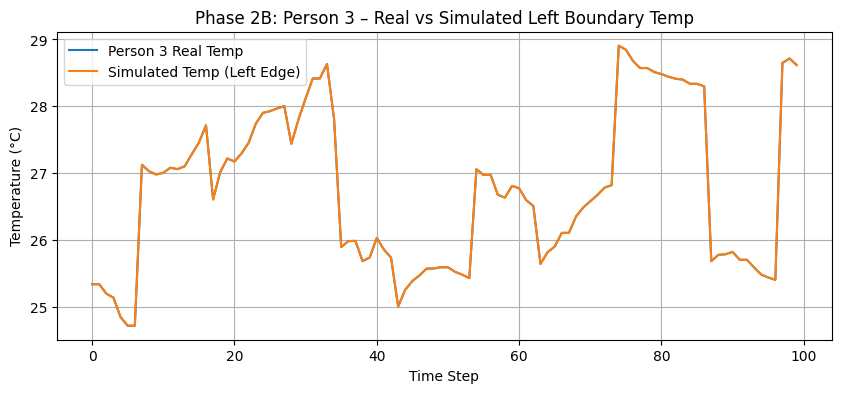

✅ Phase 2B (Person 3)
RMSE (Left Edge): 0.0000
MAE  (Left Edge): 0.0000


In [16]:
# 📦 Load Person 3 dataset and extract air temperature
df_real_p3 = pd.read_csv(file_paths['person3'])  # Path already defined in earlier steps

# Clean and align the 'at' column
real_temps_p3 = df_real_p3['at'].dropna().reset_index(drop=True)
real_temps_p3 = real_temps_p3[:Nt+1].values  # Match synthetic time steps

# 🔁 Run FDM simulation using Person 3's air temperature as left boundary
T = np.zeros(Nx)
T[-1] = 50  # Fixed right boundary
T_history_real_p3 = []

for n in range(Nt):
    T[0] = real_temps_p3[n]  # Left boundary from real data
    T_new = T.copy()
    for i in range(1, Nx - 1):
        T_new[i] = T[i] + alpha * dt / dx**2 * (T[i+1] - 2*T[i] + T[i-1])
    T = T_new
    T_history_real_p3.append(T.copy())

T_history_real_p3 = np.array(T_history_real_p3)

# 📈 Plot real vs simulated temperature at left boundary
plt.figure(figsize=(10, 4))
plt.plot(real_temps_p3[:Nt], label="Person 3 Real Temp")
plt.plot(T_history_real_p3[:, 0], label="Simulated Temp (Left Edge)")
plt.title("Phase 2B: Person 3 – Real vs Simulated Left Boundary Temp")
plt.xlabel("Time Step")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()

# 📏 Error metrics
rmse_p3 = mean_squared_error(real_temps_p3[:Nt], T_history_real_p3[:, 0])
mae_p3 = mean_absolute_error(real_temps_p3[:Nt], T_history_real_p3[:, 0])

print(f"✅ Phase 2B (Person 3)")
print(f"RMSE (Left Edge): {rmse_p3:.4f}")
print(f"MAE  (Left Edge): {mae_p3:.4f}")

### ### 📊 8. Phase 2B: Real Data Integration (using Person 4 as example)

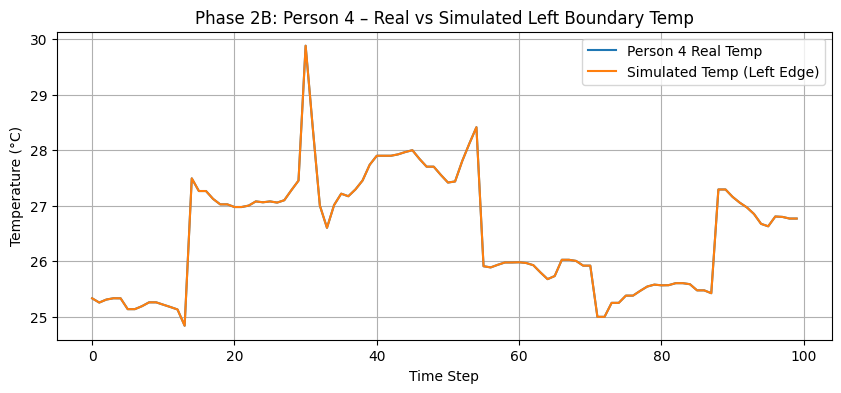

✅ Phase 2B (Person 4)
RMSE (Left Edge): 0.0000
MAE  (Left Edge): 0.0000


In [17]:
# 📦 Load Person 4 dataset and extract air temperature
df_real_p4 = pd.read_csv(file_paths['person4'])

real_temps_p4 = df_real_p4['at'].dropna().reset_index(drop=True)
real_temps_p4 = real_temps_p4[:Nt+1].values

T = np.zeros(Nx)
T[-1] = 50
T_history_real_p4 = []

for n in range(Nt):
    T[0] = real_temps_p4[n]
    T_new = T.copy()
    for i in range(1, Nx - 1):
        T_new[i] = T[i] + alpha * dt / dx**2 * (T[i+1] - 2*T[i] + T[i-1])
    T = T_new
    T_history_real_p4.append(T.copy())

T_history_real_p4 = np.array(T_history_real_p4)

plt.figure(figsize=(10, 4))
plt.plot(real_temps_p4[:Nt], label="Person 4 Real Temp")
plt.plot(T_history_real_p4[:, 0], label="Simulated Temp (Left Edge)")
plt.title("Phase 2B: Person 4 – Real vs Simulated Left Boundary Temp")
plt.xlabel("Time Step")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()

rmse_p4 = mean_squared_error(real_temps_p4[:Nt], T_history_real_p4[:, 0])
mae_p4 = mean_absolute_error(real_temps_p4[:Nt], T_history_real_p4[:, 0])

print(f"✅ Phase 2B (Person 4)")
print(f"RMSE (Left Edge): {rmse_p4:.4f}")
print(f"MAE  (Left Edge): {mae_p4:.4f}")

### ### 📊 9. Phase 2B: Real Data Integration (using Person 5 as example)

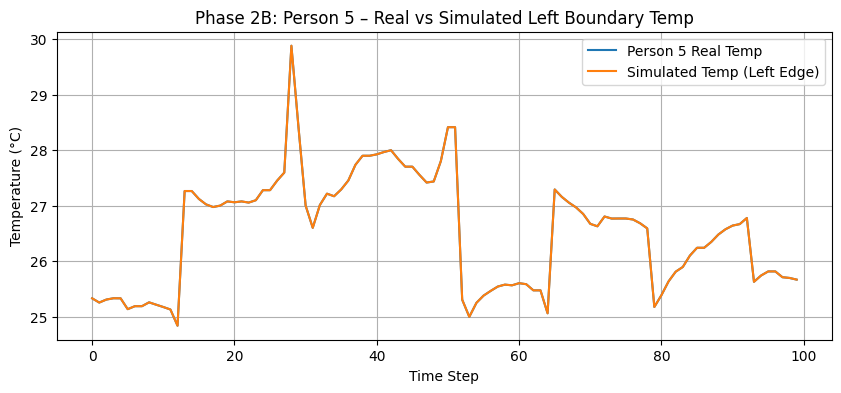

✅ Phase 2B (Person 5)
RMSE (Left Edge): 0.0000
MAE  (Left Edge): 0.0000


In [18]:
# 📦 Load Person 5 dataset and extract air temperature
df_real_p5 = pd.read_csv(file_paths['person5'])

real_temps_p5 = df_real_p5['at'].dropna().reset_index(drop=True)
real_temps_p5 = real_temps_p5[:Nt+1].values

T = np.zeros(Nx)
T[-1] = 50
T_history_real_p5 = []

for n in range(Nt):
    T[0] = real_temps_p5[n]
    T_new = T.copy()
    for i in range(1, Nx - 1):
        T_new[i] = T[i] + alpha * dt / dx**2 * (T[i+1] - 2*T[i] + T[i-1])
    T = T_new
    T_history_real_p5.append(T.copy())

T_history_real_p5 = np.array(T_history_real_p5)

plt.figure(figsize=(10, 4))
plt.plot(real_temps_p5[:Nt], label="Person 5 Real Temp")
plt.plot(T_history_real_p5[:, 0], label="Simulated Temp (Left Edge)")
plt.title("Phase 2B: Person 5 – Real vs Simulated Left Boundary Temp")
plt.xlabel("Time Step")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()

rmse_p5 = mean_squared_error(real_temps_p5[:Nt], T_history_real_p5[:, 0])
mae_p5 = mean_absolute_error(real_temps_p5[:Nt], T_history_real_p5[:, 0])

print(f"✅ Phase 2B (Person 5)")
print(f"RMSE (Left Edge): {rmse_p5:.4f}")
print(f"MAE  (Left Edge): {mae_p5:.4f}")

### 📊 10. Phase 2B: Real Data Integration (using Person 6 as example)

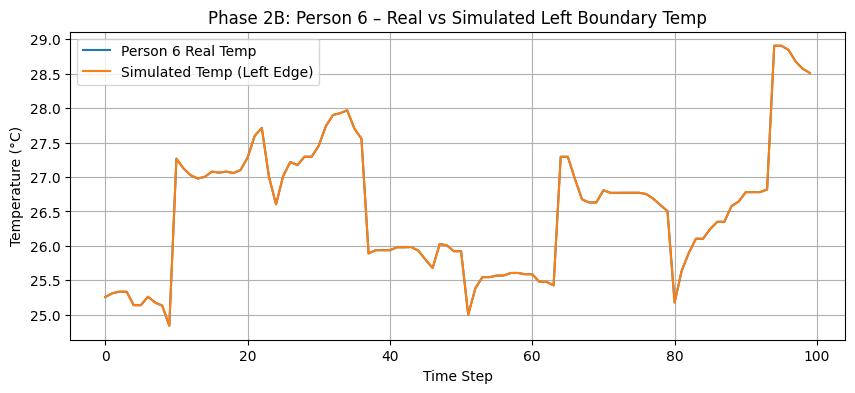

✅ Phase 2B (Person 6)
RMSE (Left Edge): 0.0000
MAE  (Left Edge): 0.0000


In [19]:
# 📦 Load Person 6 dataset and extract air temperature
df_real_p6 = pd.read_csv(file_paths['person6'])

real_temps_p6 = df_real_p6['at'].dropna().reset_index(drop=True)
real_temps_p6 = real_temps_p6[:Nt+1].values

T = np.zeros(Nx)
T[-1] = 50
T_history_real_p6 = []

for n in range(Nt):
    T[0] = real_temps_p6[n]
    T_new = T.copy()
    for i in range(1, Nx - 1):
        T_new[i] = T[i] + alpha * dt / dx**2 * (T[i+1] - 2*T[i] + T[i-1])
    T = T_new
    T_history_real_p6.append(T.copy())

T_history_real_p6 = np.array(T_history_real_p6)

plt.figure(figsize=(10, 4))
plt.plot(real_temps_p6[:Nt], label="Person 6 Real Temp")
plt.plot(T_history_real_p6[:, 0], label="Simulated Temp (Left Edge)")
plt.title("Phase 2B: Person 6 – Real vs Simulated Left Boundary Temp")
plt.xlabel("Time Step")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()

rmse_p6 = mean_squared_error(real_temps_p6[:Nt], T_history_real_p6[:, 0])
mae_p6 = mean_absolute_error(real_temps_p6[:Nt], T_history_real_p6[:, 0])

print(f"✅ Phase 2B (Person 6)")
print(f"RMSE (Left Edge): {rmse_p6:.4f}")
print(f"MAE  (Left Edge): {mae_p6:.4f}")

### 🧪  11. Thermal Diffusivity (for Person 1–6)

In [21]:
# Define a range of alpha (thermal diffusivity) values to test
alpha_values = [1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3]
efficiency_results = []

# Loop through alpha values
for test_alpha in alpha_values:
    for person in ['person1', 'person2', 'person3', 'person4', 'person5', 'person6']:
        df = pd.read_csv(file_paths[person])
        real_temp = df['at'].dropna().reset_index(drop=True)
        real_temp = real_temp[:Nt+1].values

        T = np.zeros(Nx)
        T[-1] = 50
        T_hist = []

        for n in range(Nt):
            T[0] = real_temp[n]
            T_new = T.copy()
            for i in range(1, Nx - 1):
                T_new[i] = T[i] + test_alpha * dt / dx**2 * (T[i+1] - 2*T[i] + T[i-1])
            T = T_new
            T_hist.append(T.copy())

        T_hist = np.array(T_hist)
        internal_avg_temp = np.sum(T_hist[:, Nx // 2]) / T_total

        efficiency_results.append({
            "Alpha": test_alpha,
            "Person": person,
            "Avg Internal Temp (°C)": internal_avg_temp
        })

# Convert to DataFrame and display
efficiency_alpha_df = pd.DataFrame(efficiency_results)
efficiency_alpha_df = efficiency_alpha_df.sort_values(by=["Alpha", "Person"]).reset_index(drop=True)

# Show table
print(efficiency_alpha_df.to_string(index=False))


  Alpha  Person  Avg Internal Temp (°C)
0.00001 person1            1.556392e-39
0.00001 person2            1.556403e-39
0.00001 person3            1.556410e-39
0.00001 person4            1.556390e-39
0.00001 person5            1.556392e-39
0.00001 person6            1.556399e-39
0.00005 person1            2.480679e-23
0.00005 person2            2.480792e-23
0.00005 person3            2.480856e-23
0.00005 person4            2.480663e-23
0.00005 person5            2.480681e-23
0.00005 person6            2.480745e-23
0.00010 person1            8.251412e-17
0.00010 person2            8.252353e-17
0.00010 person3            8.252863e-17
0.00010 person4            8.251279e-17
0.00010 person5            8.251423e-17
0.00010 person6            8.251975e-17
0.00050 person1            6.073369e-05
0.00050 person2            6.080739e-05
0.00050 person3            6.084427e-05
0.00050 person4            6.072025e-05
0.00050 person5            6.073309e-05
0.00050 person6            6.078117e-05


### ⚠️ Conclusion:
α = 1e-3 seems to be a realistic upper limit before simulation blows up.

α = 5e-3 produces unrealistic results — most likely due to instability in the explicit finite difference scheme.

Stability limit:

𝛼
⋅
𝑑
𝑡
𝑑
𝑥
2
<
0.5
dx
2

α⋅dt
​
 <0.5

In [26]:
stability_limit = 0.5
safe_alpha_max = stability_limit * dx**2 / dt
print(f"✅ Maximum stable α: {safe_alpha_max:.2e}")

✅ Maximum stable α: 2.08e-03
